# 딥러닝 기초
- 순전파와 역전파의 원리를 이해하고 신경망의 '층'을 구현하는 방법을 살펴본다.

## 딥러닝 개요

### 딥러닝이란?
- 다수의 층으로 구성된 신경망을 사용하는 머신러닝의 한 방법. 뉴런이라는 개별 단위로 구성되어 있다.

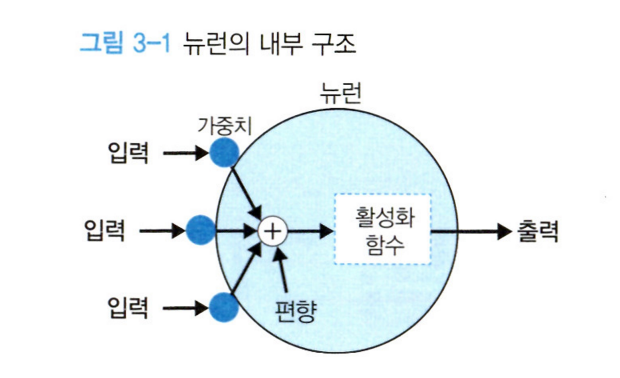

- 하나의 뉴런은 여러 개의 입력을 받는다.
- 각 입력에 '가중치'의 곱을 모두 합한 값에 편향(bias)를 더하고 활성화 함수를 통해 이 값을 처리하면 출력된다.
- 뉴런으로 여러 층을 만들고 연결하면 신경망이 구축된다.

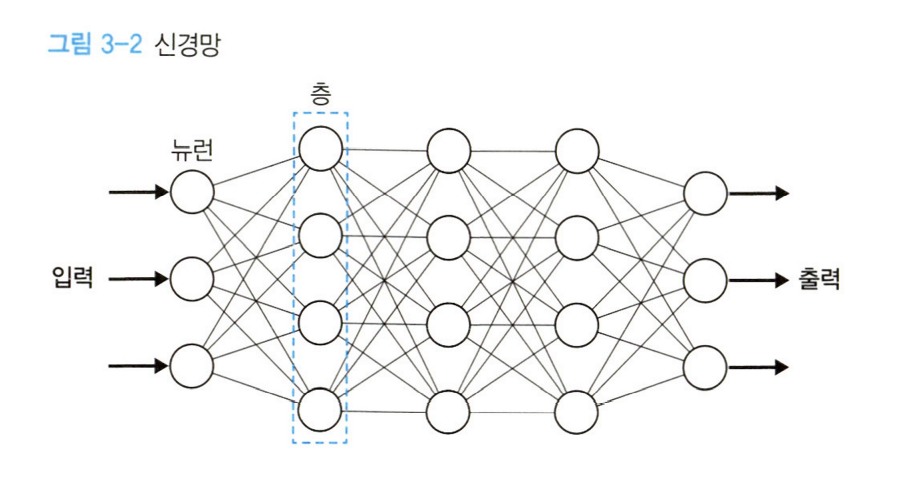

- 신경망 전체에 입력과 출력이 있고, 출력과 정답과의 오차가 작아지도록 파라미터(가중치와 편향)를 조정하면서 학습이 진행됨.
- **역전파(backpropagation)** 또는 **오차 역전파** : 1개 층씩 반대 방향으로 오차를 전파시켜서 가중치와 편향을 수정해나가는 알고리즘

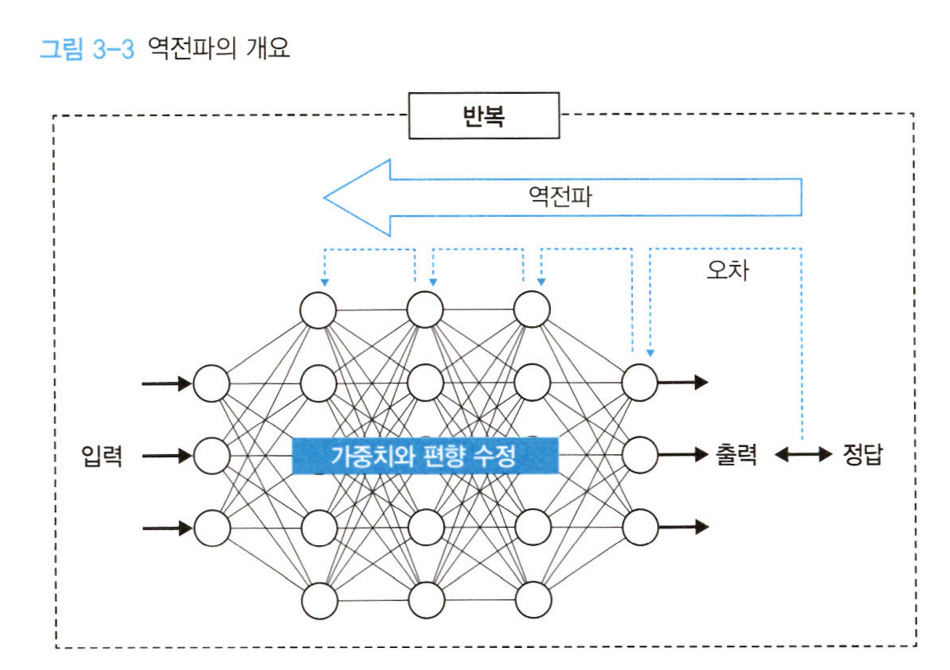

- 역전파에서는 데이터가 신경망을 반대 방향으로 거슬러 올라가며 각 층의 파라미터를 조정한다. 
- 신경망의 여러 파라미터가 반복적으로 조정되는 과정에서 네트워크는 조금씩 학습하게 되고 적절한 예측이 가능해진다.
- 여러 층으로 구성된 신경망의 학습을 **딥러닝(심층학습)**이라고 한다.
- 층 수가 많을수록 신경망의 표현력은 높아지지만 그에 따라 학습이 어려워진다.

### 층의 방향과 층의 개수
- 신경망은 **입력층**, **은닉층(중간층)**, **출력층**의 3개의 층으로 분류된다.

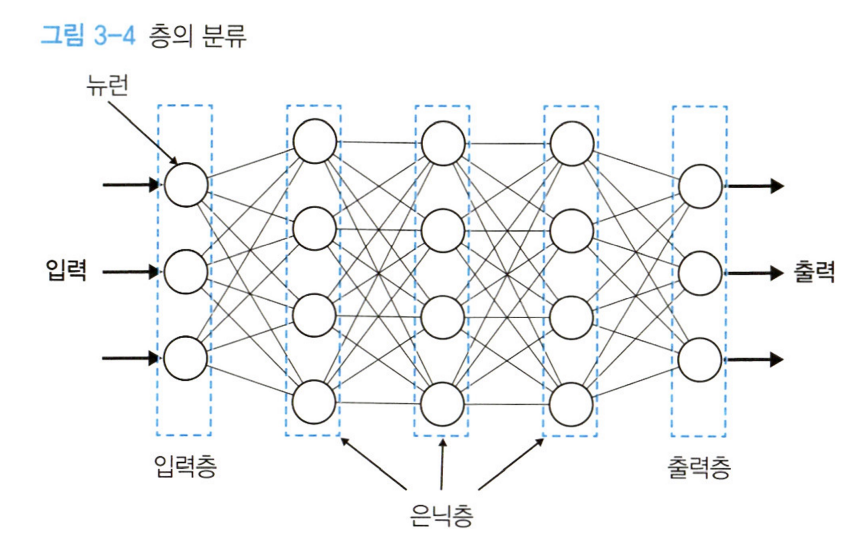

- 입력층은 전체 신경망의 입력값을 받아들이고, 출력층은 전체 신경망의 출력값을 내보낸다.
- 은닉층은 입력층과 출력층 사이에 위치한 여러 개의 층이다.
- 은닉층과 출력층에서만 뉴런의 연산이 수행되고, 입력층은 입력받은 값을 은닉층으로 전달하기만 한다.
- 일반적인 신경망에서 하나의 뉴런에서 출력된 값은 다음 층에 있는 모든 뉴런의 입력으로 연결된다.
- **순전파(forward propagation)** : 신경망에서 입력부터 시작해 출력 방향으로 정보가 전달되는 것
- **역전파** : 출력에서 입력 방향으로 정보가 반대방향으로 전달되는 것

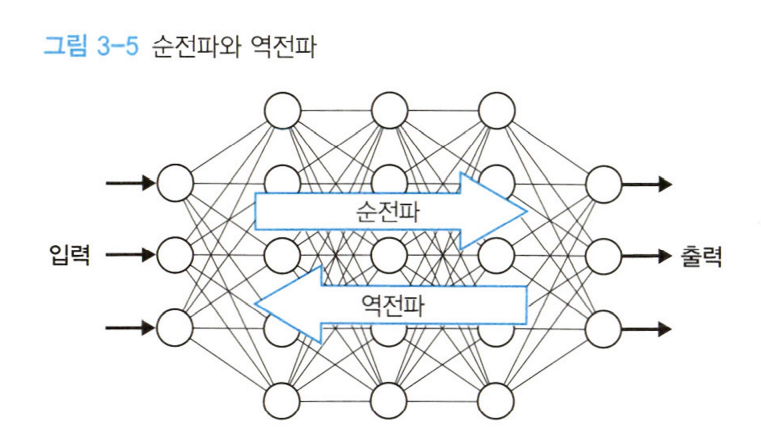

- 입력에 가까운 층을 앞 층, 출력에 가까운 층을 뒤 층으로 표현한다.
- 입력층이 1개, 은닉층이 3개, 출력층이 1개 => 전부 5층
- 입력층은 뉴런의 연산이 없으므로 입력층을 층의 개수에 포함시키지 않는 경우도 있으나 이 책에서는 입력층도 층의 개수에 포함한다.

### 경사 하강법
- 역전파에서는 경사 하강법을 이용해 파라미터의 갱신량을 결정한다.

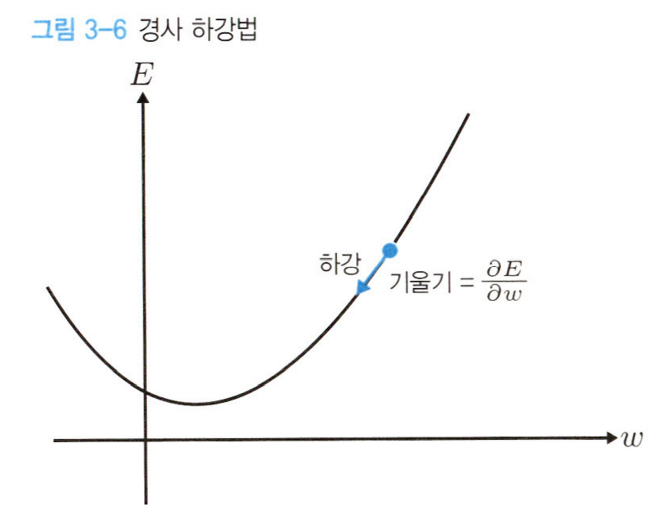

- 가로축 $w$는 가중치, 세로축 $E$는 오차
- $∂E\over∂w$ : 오차 $E$를 가중치 $w$로 편미분한 것인데 이 값은 곡선의 기울기(경사)를 나타낸다.
- 가중치에 따라 오차가 변하는데 실제로는 이렇게 곡선의 형태를 알기가 어렵기 때문에 오차가 최소가 되는 방향으로 조금씩 가중치를 변화시켜 간다.
- 이 곡선에서 오차의 기울기가 조금씩 하강하도록 신경망의 모든 가중치를 조금씩 줄여가면서 오차($E$)가 최소가 되는 지점을 찾아나간다.
- 신경망의 모든 가중치와 편향을 수정하기 위해 우선 필요한 것은 모든 가중치와 편향에 대한 오차의 기울기는 구하는 것
- **확률적 경사 하강법(Stochastic Gradient Descent, SGD)** : 가중치와 편향을 수정하는 가장 간단한 방법. 편미분을 이용하여 표현함.

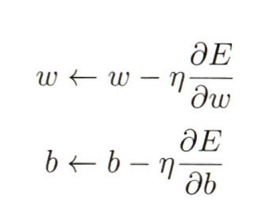

- $w$는 가중치, $b$는 편향, $E$는 오차를 의미함. 화살표는 값을 수정한다는 뜻.
- η(에타) : **학습률**이라고 부르는 상수. 학습 속도를 결정함.
- $\partial E\over∂ w$와 $\partial E\over∂ b$가 기울기
- 기울기를 구하기 위해서는 수학적 테크닉이 필요하다.
- 신경망에서 모든 기울기를 구한 후 위의 식에 따라 모든 가중치와 편향을 수정한다.

### 에포크와 배치
- **에포크(epoch)**: 모든 훈련 데이터를 1회 학습하는 것
- 1에포크에 모든 학습 데이터를 사용하게 된다.
- 입력값과 정답값 한 쌍을 이 책에서는 샘플이라고 부르며, 이 샘플 그룹을 **배치(batch)**라고 한다.
- 1회 학습에 1개의 배치가 사용된다.
- 1에포크에 사용되는 훈련 데이터는 여러 개의 배치로 분할된다.

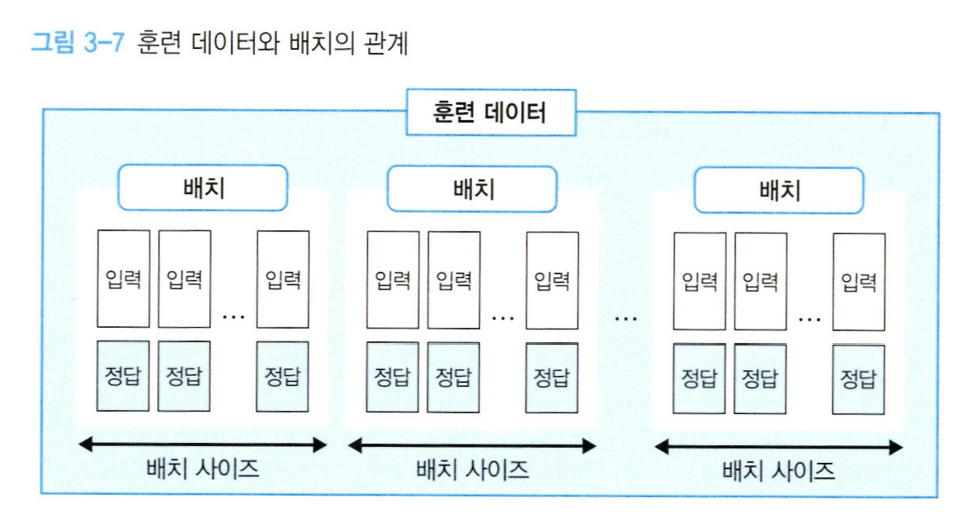

- **배치 사이즈**: 배치에 포함된 샘플 데이터의 개수
- 하나의 배치에 포함된 모든 샘플을 사용해 가중치와 편향을 수정하기 때문에 배치 사이즈는 가중치와 편향을 수정하는 간격이라고 표현할 수 있다.
- 배치 사이즈는 학습 중에는 일정하다.
- 배치 사이즈에 따라 모든 훈련 데이터를 한 번에 사용하는 배치 학습, 샘플 데이터마다 학습하는 온라인 학습 방법도 있지만, 이 책에서는 훈련 데이터를 작은 크기의 배치로 분할해 학습시키는 **미니 배치(mini batch)**를 주로 사용한다.
- 예) 훈련 데이터의 샘플 수가 1,000개일 때, 모두 사용하면 1에포크가 되지만, 배치 사이즈를 50으로 설정하면 1에포크당 20회로 수정된다.
- 배치 사이즈를 적절하게 설정하는 것은 상당히 어려운 문제이다.
- 일반적으로는 10~100 정도의 배치 사이즈를 설정할 때가 많다.


## 전결합층 순전파
- **전결합층(fully connected layer)** : 일반적인 신경망의 층. 

### 순전파의 수식
- 순전파를 수식으로 표현하기 위해 두 층간의 연결을 생각해본다.

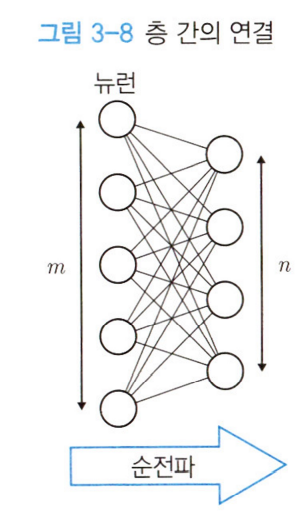

- 앞 층의 모든 뉴런은 뒤 층의 모든 뉴런과 연결되어 있다. => 뒤 층의 모든 뉴런이 앞 층의 모든 뉴런과 연결되어 있다.
- 뒤 층의 각 뉴런의 입력값에 가중치를 곱한다.
- 가중치의 개수와 입력의 수가 일치하므로, 앞 층 뉴런의 수를 $m$이라고 하면 뒤 뉴런 1개는 $m$개의 가중치를 갖게 된다.
- 뒤 층 뉴런의 총 수를 $n$이라고 하면 뒤 층에는 $m$x$n$개의 가중치가 존재하게 된다.
- 앞 층의 첫 번째 뉴런으로부터 뒤 층의 두 번째 뉴런에 입력되는 가중치는 $w_{12}$로 표시한다.
- 가중치는 앞 층의 모든 뉴런과 뒤 층의 모든 뉴런의 조합으로 설정되는데, 이 계산에서 행렬이 도움된다.
- $m$x$n$행렬은 뒤 층의 모든 가중치를 괄호 안에 넣어 표시할 수 있다.

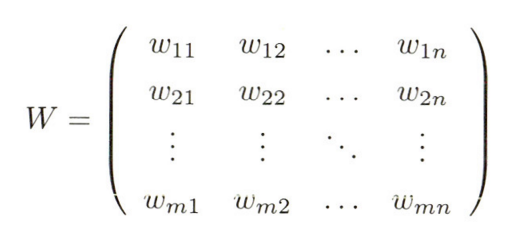

- $W$는 가중치를 표시하는 행렬
- 앞 층의 출력(=뒤 층의 입력)은 벡터로 표시 가능하다.

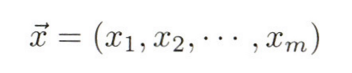

- 앞 층에 $m$개의 뉴런이 있으므로 벡터의 원소 개수는 $m$이 된다.
- 앞 층의 출력은 뒤 층의 입력과 같다.
- 편향도 벡터로 표기 가능하다.
- 편향 개수는 뒤 층 뉴런의 개수와 같고 뒤 층 뉴런의 개수가 $n$개이므로 편향 $\vec{b}$는 다음과 같이 나타낼 수 있다.

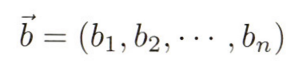

- 뒤 층의 출력 수는 뉴런의 수 $n$과 동일하므로 벡터 $\vec{y}$를 이용해 다음과 같이 표기할 수 있다.

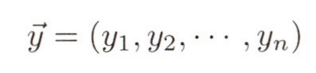

- 입력과 가중치의 곱을 모두 더한 값은 행렬 곱을 이용해 한 번에 구할 수 있다.
- $\vec{x}$를 1 x $m$ 행렬로 생각하면 다음과 같은 행렬 곱으로 각 뉴런에서 입력과 가중치 곱의 총합을 구할 수 있다.

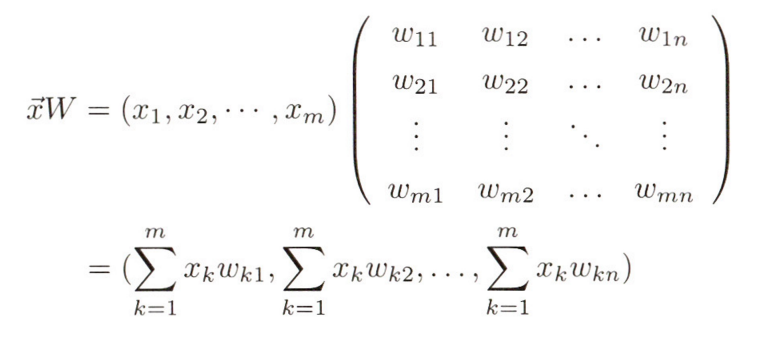

- 여기에 편향 $\vec{b}$를 더한 것을 $\vec{u}$라고 하면, $\vec{u}$는 다음과 같이 표현할 수 있다.

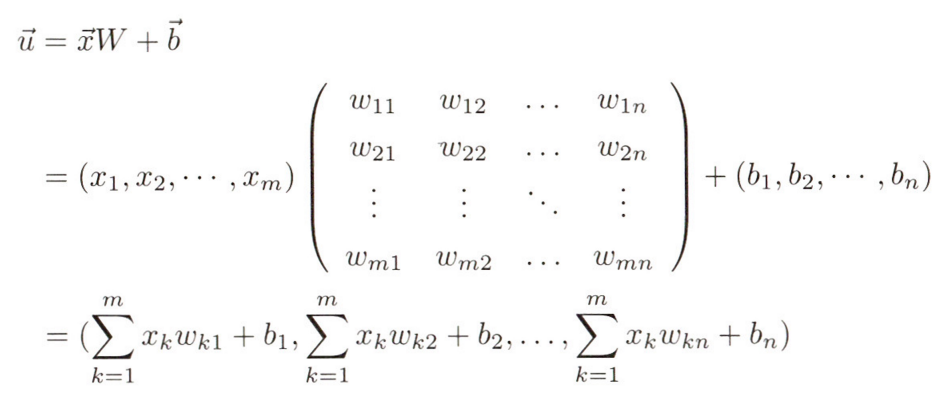

 - $\vec{u}$의 각 원소는 가중치와 입력을 곱하고 모두 더한 값에 편향을 더한 것이 된다.
 - 다음 단계에서는 활성화 함수를 사용한다.
 - 벡터 $\vec{u}$의 각 원소를 활성화 함수에 입력해 처리하고 뒤 층의 출력을 표시하는 벡터 $\vec{y}$를 구한다.

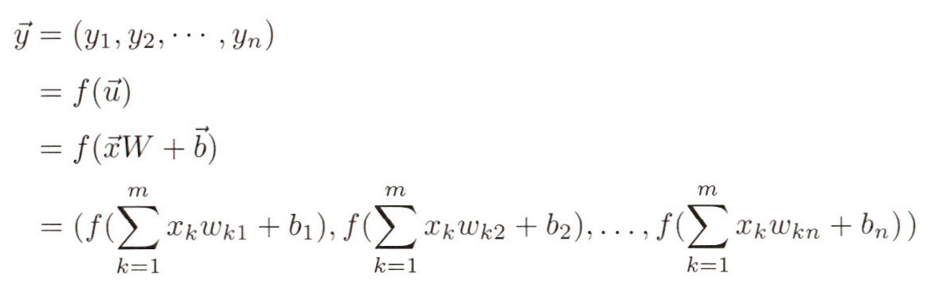

- 순전파를 입출력값이 벡터인 수식으로 정리할 수 있다.